In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import kagglehub
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

# 1. Gathering Data from Kaggle

In [3]:
# Download the latest version of the dataset.
path = kagglehub.dataset_download("arshkon/linkedin-job-postings")

In [4]:
# Identify the paths to the desired data.
postings_path = path + "/postings.csv"
benefits_path = path + "/jobs/benefits.csv"
industries_path = path + "/jobs/job_industries.csv"
skills_path = path + "/jobs/job_skills.csv"
salaries_path = path + "/jobs/salaries.csv"

In [5]:
# Read the data into dataframes.
df_postings = pd.read_csv(postings_path)        # Data on job listings.
df_benefits = pd.read_csv(benefits_path)        # Data on job benefits.
df_industries = pd.read_csv(industries_path)    # Data on job industries.
df_skills = pd.read_csv(skills_path)            # Data on job skills.
df_salaries = pd.read_csv(salaries_path)        # Data on job salaries.

# 2 - Pandas Data Review

This section performs a systematic data review for the project datasets that were loaded earlier.

Steps included:
- Show shapes (rows, columns) for each DataFrame loaded
- Display column names and dtypes
- Show summary statistics with .describe()
- List unique values / top counts for categorical columns
- Plot histograms and boxplots for numeric distributions
- Per-feature summary (value_counts or describe)
- Correlation heatmap for numeric features


### Show DataFrame Shapes

In [190]:
# Print shape (rows, cols) for each dataframe
# Print the shape of postings
print('df_postings shape:', df_postings.shape)
print('df_benefits shape:', df_benefits.shape)
print('df_industries shape:', df_industries.shape)
print('df_skills shape:', df_skills.shape)
print('df_salaries shape:', df_salaries.shape)

df_postings shape: (123849, 31)
df_benefits shape: (67943, 3)
df_industries shape: (164808, 2)
df_skills shape: (213768, 2)
df_salaries shape: (40785, 8)


### Display Column Names and dTypes


In [6]:
# Show column names and data types for main dataframe (postings)
print('\nColumns and dtypes for df_postings:')
df_postings.dtypes


Columns and dtypes for df_postings:


job_id                          int64
company_name                   object
title                          object
description                    object
max_salary                    float64
pay_period                     object
location                       object
company_id                    float64
views                         float64
med_salary                    float64
min_salary                    float64
formatted_work_type            object
applies                       float64
original_listed_time          float64
remote_allowed                float64
job_posting_url                object
application_url                object
application_type               object
expiry                        float64
closed_time                   float64
formatted_experience_level     object
skills_desc                    object
listed_time                   float64
posting_domain                 object
sponsored                       int64
work_type                      object
currency    

### Summarize DataFrames with describe()

In [7]:
# Quick summary statistics
print('\nNumeric summary (describe) for df_postings:')
df_postings.select_dtypes(include=[np.number]).describe().T

print('\nAll columns summary (describe include=all) - note: object columns will show counts/unique/top/freq:')
df_postings.describe(include='all').T


Numeric summary (describe) for df_postings:

All columns summary (describe include=all) - note: object columns will show counts/unique/top/freq:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
job_id,123849.0,NaN,NaN,NaN,3896402138.074615,84043545.161881,921716.0,3894586595.0,3901998406.0,3904707077.0,3906267224.0
company_name,122130,24428,Liberty Healthcare and Rehabilitation Services,1108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,123849,72521,Sales Manager,673,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,123842,107827,Position Summary: Our Sales Manager has managi...,474,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max_salary,29793.0,NaN,NaN,NaN,91939.423461,701110.138622,1.0,48.28,80000.0,140000.0,120000000.0
pay_period,36073,5,YEARLY,20628,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,123849,8526,United States,8125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_id,122132.0,NaN,NaN,NaN,12204012.335015,25541431.65742,1009.0,14352.0,226965.0,8047188.0,103472979.0
views,122160.0,NaN,NaN,NaN,14.618247,85.903598,1.0,3.0,4.0,8.0,9975.0
med_salary,6280.0,NaN,NaN,NaN,22015.619876,52255.873846,0.0,18.94,25.5,2510.5,750000.0


### List Unique Values and Counts

In [16]:
# Unique values and top value counts for categorical columns in df_postings
cat_cols = df_postings.select_dtypes(include=['object','category']).columns.tolist()
print('Categorical columns found:', cat_cols)

for c in cat_cols:
    print('\n===', c, '===')
    try:
        vc = df_postings[c].value_counts(dropna=False)
        print('unique values:', df_postings[c].nunique(dropna=False))
        display(vc.head(10))
    except Exception as e:
        print('Could not compute value_counts for', c, "->", e)

Categorical columns found: ['company_name', 'title', 'description', 'pay_period', 'location', 'formatted_work_type', 'job_posting_url', 'application_url', 'application_type', 'formatted_experience_level', 'skills_desc', 'posting_domain', 'work_type', 'currency', 'compensation_type']

=== company_name ===
unique values: 24429


company_name
NaN                                               1719
Liberty Healthcare and Rehabilitation Services    1108
The Job Network                                   1003
J. Galt                                            604
TEKsystems                                         529
Lowe's Companies, Inc.                             527
Ingersoll Rand                                     517
Capital One                                        496
Cogent Communications                              476
Insight Global                                     418
Name: count, dtype: int64


=== title ===
unique values: 72521


title
Sales Manager                      673
Customer Service Representative    373
Project Manager                    354
Administrative Assistant           254
Senior Accountant                  238
Executive Assistant                228
Salesperson                        211
Registered Nurse                   210
Receptionist                       204
Staff Accountant                   200
Name: count, dtype: int64


=== description ===
unique values: 107828


description
Position Summary: Our Sales Manager has managing partnerresponsibilities for a team of 5-25 Executive Consultants in marketing J.Galt's SaaS memberships and consulting services. In addition, the ManagingPartner/Sales Manager represents J. Galt in attracting memberships throughchannel partners, strategic alliances, chambers of commerce, and state,trade, and professional associations.\nOur Mission: We believe in helping small and medium-sized businessessucceed. It is tragic that most business owners carry the credit needs oftheir business. They often rely on personal credit cards, or they signpersonally for the business to access the funding, equipment, or facilities thebusiness requires to operate.\nWhat We Do: J. Galt Finance Suite offers a SaaS platform and consultativeservices to small and medium-sized business owners. Our system includes aproven 7-step process to build credit for a business around the business EINwithout personal guarantees or using the owner’s personal 


=== pay_period ===
unique values: 6


pay_period
NaN         87776
YEARLY      20628
HOURLY      14741
MONTHLY       518
WEEKLY        177
BIWEEKLY        9
Name: count, dtype: int64


=== location ===
unique values: 8526


location
United States    8125
New York, NY     2756
Chicago, IL      1834
Houston, TX      1762
Dallas, TX       1383
Atlanta, GA      1363
Boston, MA       1176
Austin, TX       1083
Charlotte, NC    1075
Phoenix, AZ      1059
Name: count, dtype: int64


=== formatted_work_type ===
unique values: 7


formatted_work_type
Full-time     98814
Contract      12117
Part-time      9696
Temporary      1190
Internship      983
Volunteer       562
Other           487
Name: count, dtype: int64


=== job_posting_url ===
unique values: 123849


job_posting_url
https://www.linkedin.com/jobs/view/3906267224/?trk=jobs_biz_prem_srch    1
https://www.linkedin.com/jobs/view/921716/?trk=jobs_biz_prem_srch        1
https://www.linkedin.com/jobs/view/1829192/?trk=jobs_biz_prem_srch       1
https://www.linkedin.com/jobs/view/10998357/?trk=jobs_biz_prem_srch      1
https://www.linkedin.com/jobs/view/23221523/?trk=jobs_biz_prem_srch      1
https://www.linkedin.com/jobs/view/35982263/?trk=jobs_biz_prem_srch      1
https://www.linkedin.com/jobs/view/91700727/?trk=jobs_biz_prem_srch      1
https://www.linkedin.com/jobs/view/103254301/?trk=jobs_biz_prem_srch     1
https://www.linkedin.com/jobs/view/112576855/?trk=jobs_biz_prem_srch     1
https://www.linkedin.com/jobs/view/3906265303/?trk=jobs_biz_prem_srch    1
Name: count, dtype: int64


=== application_url ===
unique values: 84801


application_url
NaN                                                                                                                                                  36665
https://app.dataannotation.tech/worker_signup?projects=PROG_SA&worker_src=L&utm_medium=display&utm_source=linkedin&utm_campaign=softwaredeveloper      205
https://revature.com/jobs/entry-level-automotive-engineer/?utm_source=linkedin&sourcedBy=BalaLP                                                         67
https://app.dataannotation.tech/worker_signup?worker_src=LI&utm_medium=display&utm_source=linkedin&utm_campaign=aicontentwriter                         60
https://www.english1.com/apply-now/?utm_source=linkedin&utm_medium=listing&utm_term=china&utm_content=linkedin&utm_campaign=linkedin                    44
https://optimabiosupply.com/job-opening-data-entry-clerk/                                                                                               43
https://dataforcecommunity.transperfect.com/project/am


=== application_type ===
unique values: 4


application_type
OffsiteApply          84607
ComplexOnsiteApply    31049
SimpleOnsiteApply      8192
UnknownApply              1
Name: count, dtype: int64


=== formatted_experience_level ===
unique values: 7


formatted_experience_level
Mid-Senior level    41489
Entry level         36708
NaN                 29409
Associate            9826
Director             3746
Internship           1449
Executive            1222
Name: count, dtype: int64


=== skills_desc ===
unique values: 2213


skills_desc
NaN                                                                                                                                                                                     121410
This position requires the following skills: Elder care, Healthcare, Hospice Care, Patient Care                                                                                             28
This position requires the following skills: Advocacy, Community Outreach, CSR / Volunteer Coordination, Fundraising, Lobbying, Public Relations                                            19
Optometry, Contact Lenses, Glaucoma, Ocular Disease, Eye Exams, Cataract, Low Vision, Diabetes, Eyewear                                                                                     19
This position requires the following skills: Accounting                                                                                                                                     14
This position requires the follow


=== posting_domain ===
unique values: 4444


posting_domain
NaN                         39968
www.click2apply.net          3811
click.appcast.io             2255
jsv3.recruitics.com          1921
jobs.smartrecruiters.com     1557
boards.greenhouse.io         1493
rr.jobsyn.org                1202
recruiting.ultipro.com       1175
recruiting.adp.com            809
sjobs.brassring.com           785
Name: count, dtype: int64


=== work_type ===
unique values: 7


work_type
FULL_TIME     98814
CONTRACT      12117
PART_TIME      9696
TEMPORARY      1190
INTERNSHIP      983
VOLUNTEER       562
OTHER           487
Name: count, dtype: int64


=== currency ===
unique values: 7


currency
NaN    87776
USD    36058
EUR        6
CAD        3
BBD        2
AUD        2
GBP        2
Name: count, dtype: int64


=== compensation_type ===
unique values: 2


compensation_type
NaN            87776
BASE_SALARY    36073
Name: count, dtype: int64

### Plot Numeric Distributions

Numeric columns: ['job_id', 'max_salary', 'company_id', 'views', 'med_salary', 'min_salary', 'applies', 'original_listed_time', 'remote_allowed', 'expiry', 'closed_time', 'listed_time', 'sponsored', 'normalized_salary', 'zip_code', 'fips']


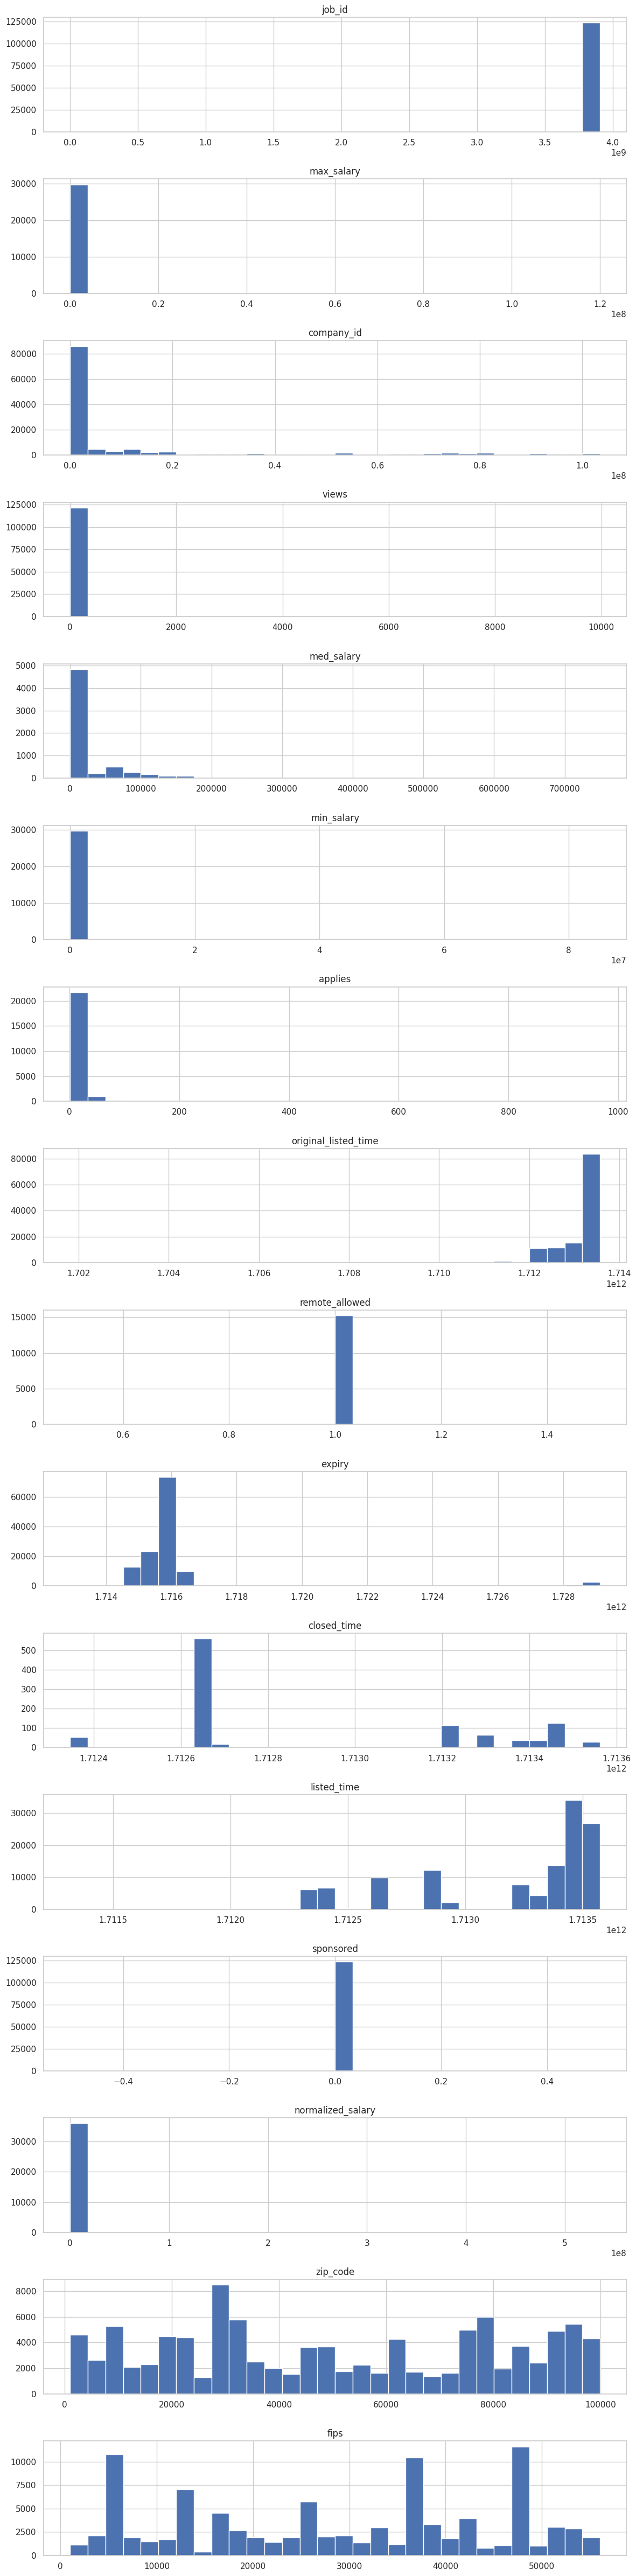

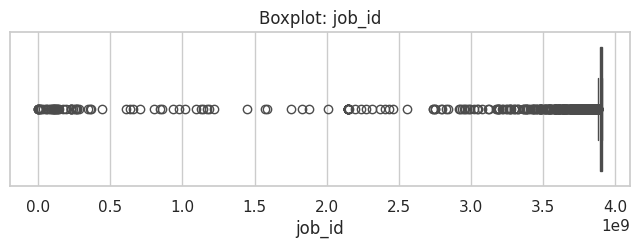

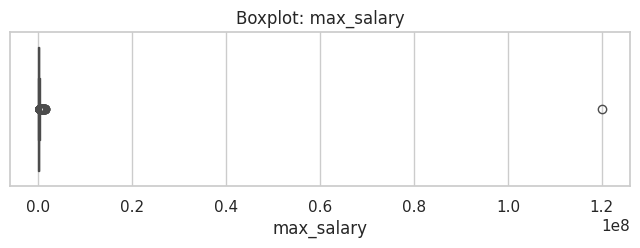

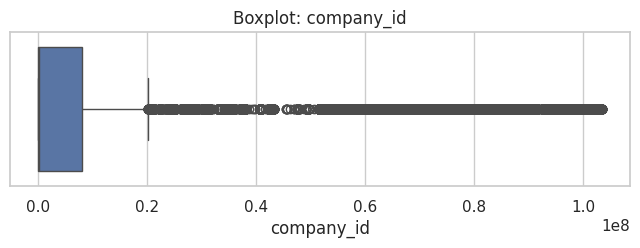

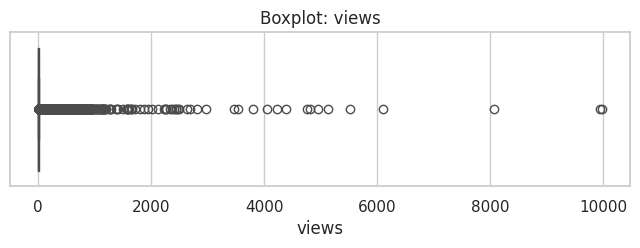

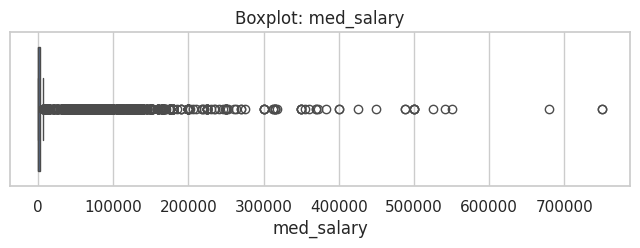

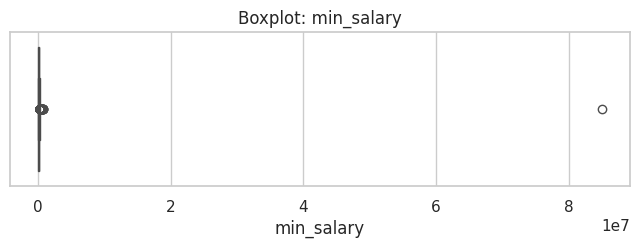

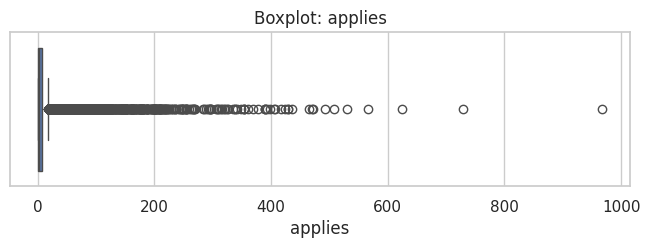

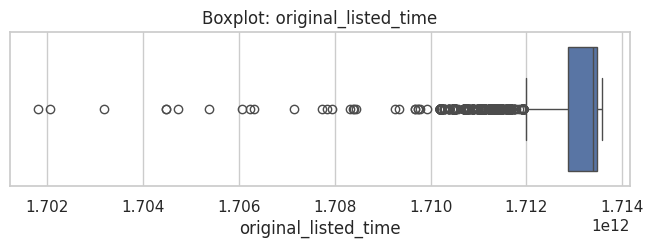

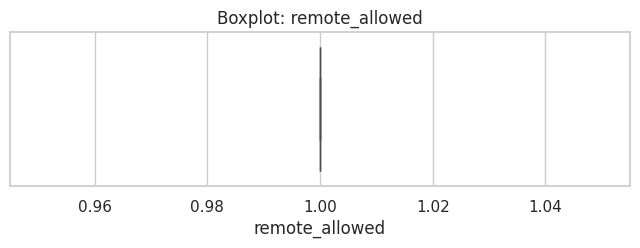

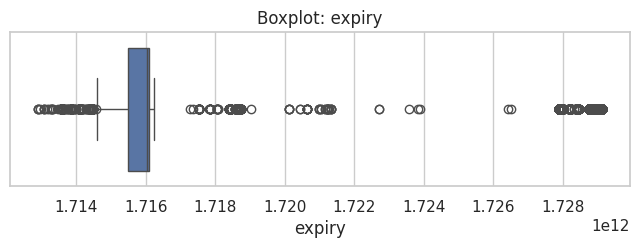

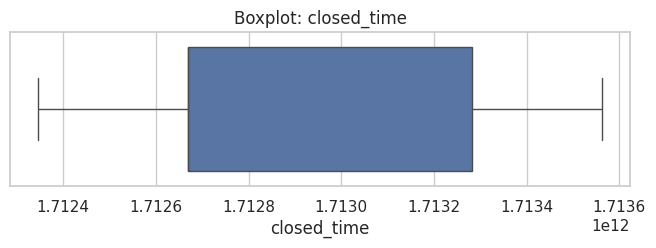

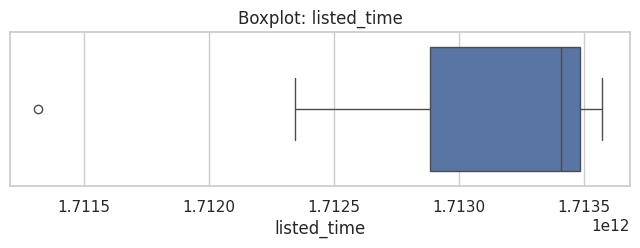

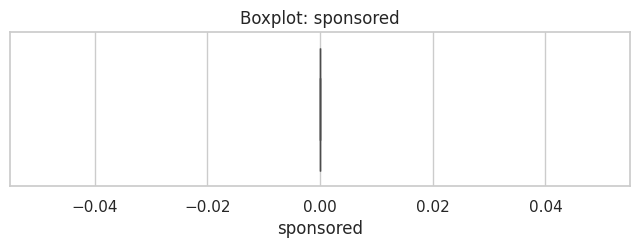

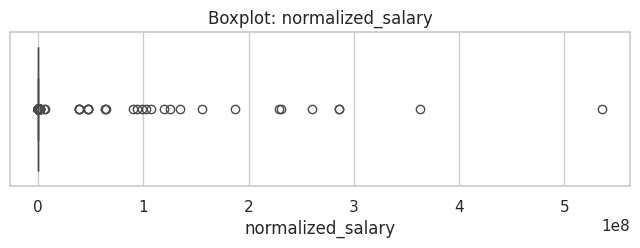

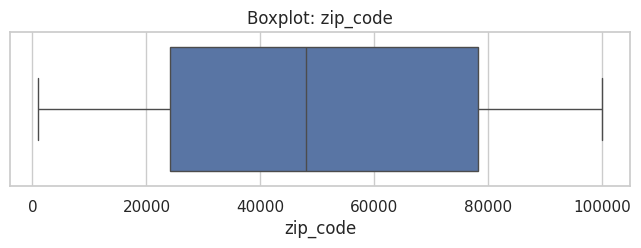

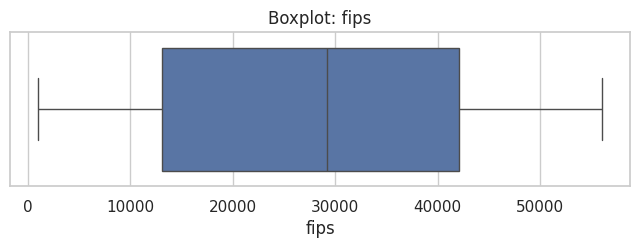

In [194]:
# Plot distributions for numeric columns (histograms + boxplots)
sns.set(style='whitegrid')

num_cols = df_postings.select_dtypes(include=[np.number]).columns.tolist()
print('Numeric columns:', num_cols)

if len(num_cols) > 0:
    # Histograms
    df_postings[num_cols].hist(bins=30, figsize=(12, 3*len(num_cols)), layout=(len(num_cols),1))
    plt.tight_layout()

    # Boxplots (one per numeric column)
    for c in num_cols:
        plt.figure(figsize=(8,2))
        sns.boxplot(x=df_postings[c])
        plt.title(f'Boxplot: {c}')
        plt.show()
else:
    print('No numeric columns to plot.')

### Why Use Histograms and Boxplots?

- Histograms
  - What: show the distribution of a single numeric variable by binning values and plotting counts (or density) per bin.
  - What you learn: modality (uni/bi/multi-modal), skewness (left/right), spread, gaps, and approximate density of values.
  - Limitations: results depend on bin width and edges; can hide small numbers of outliers; less precise for comparing multiple groups unless using multiple histograms or normalized densities.

- Boxplots (a.k.a. box-and-whisker)
  - What: show five-number summary (minimum, first quartile Q1, median, third quartile Q3, maximum) and identify outliers beyond the whiskers (commonly 1.5 * IQR).
  - What you learn: central tendency (median), spread (IQR), skew (median vs center of box), and clear identification of outliers.
  - Strengths: compact, robust to binning choices, excellent for side-by-side comparisons across groups or categories.
  - Limitations: does not show modality or detailed shape of the distribution (e.g., bimodality will be hidden).

- Why use both together
  - They complement each other: histogram reveals the full shape (peaks, gaps), while the boxplot highlights summary statistics and outliers.
  - Use histogram to understand the distribution shape and decide if transformations (log, sqrt) are needed; use boxplot to compare spread and detect outliers quickly.

- Practical tips
  - For heavily skewed numeric features, consider plotting the histogram on a log scale or plotting both original and transformed versions.
  - When there are many numeric columns, plot a selected subset or create small multiples (grid) to keep figures readable.
  - Combine with value counts and summary statistics (mean, median, std, IQR, missing%) to make informed preprocessing decisions.

This explanation supplements the histogram and boxplot cells earlier — run those cells to see the visualizations, then refer back here to guide interpretation.

### Correlation Heatmap for Numeric Features

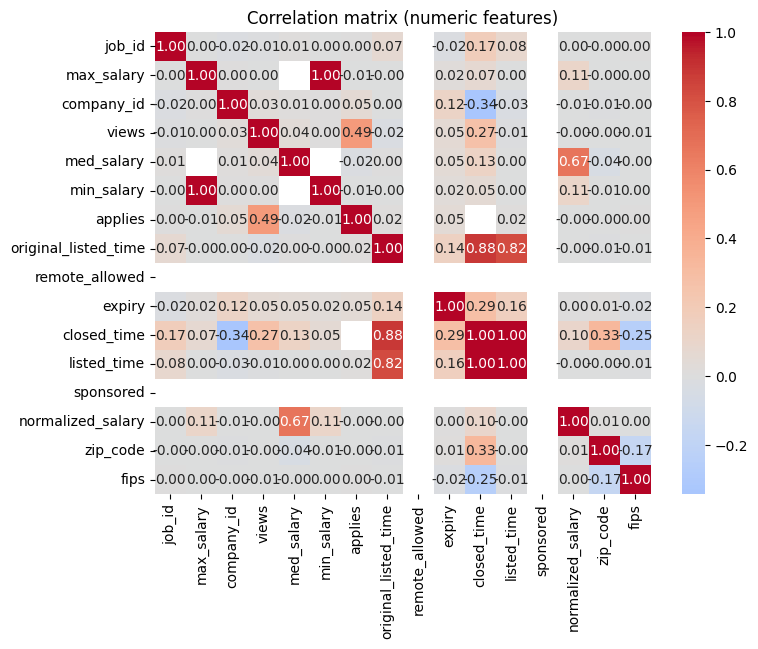

In [6]:
# Correlation matrix and heatmap for numeric features
num_df = df_postings.select_dtypes(include=[np.number])
if not num_df.empty:
    corr = num_df.corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
    plt.title('Correlation matrix (numeric features)')
    plt.show()
else:
    print('No numeric features to compute correlation.')


### How to Interpret Heatmap

- Correlation values shown in the heatmap are Pearson correlation coefficients which measure linear relationship between two numeric features.
- Range: -1.00 to 1.00
  - Close to 1.00: strong positive linear relationship (as feature A increases, feature B tends to increase).
  - Close to -1.00: strong negative linear relationship (as feature A increases, feature B tends to decrease).
  - Close to 0.00: little or no linear relationship (features appear uncorrelated in a linear sense).

- Practical thresholds (rule-of-thumb):
  - |r| >= 0.7 — strong correlation (watch for multicollinearity if using linear models).
  - 0.3 <= |r| < 0.7 — moderate correlation (may be interesting depending on domain).
  - |r| < 0.3 — weak or negligible linear relationship.

- Important notes:
  - Correlation does not imply causation. A high |r| only indicates association, not a causal link.
  - Pearson correlation only captures linear relationships. Two variables can be strongly related nonlinearly and still show low Pearson r.
  - Outliers can strongly affect correlation values; inspect scatter plots or robust measures if a surprising correlation appears.

Suggested actions when you see strong correlations:
- If two features are highly correlated (|r| >= 0.7), consider removing one, combining them, or using dimensionality reduction (PCA) to avoid multicollinearity in regression-style models.
- For moderate correlations, verify domain relevance before taking action — moderate correlation can be useful predictive information.
- For near-zero correlations, the features may still be useful in non-linear models; don't discard solely on low Pearson r without further checks.


# 3 - Cleaning Data for df_postings

### Merging df_posting with df_salaries

Due to the missing amount of salaries data in df_posting, I merged df_posting with df_salaries to get a more comprehensive view on the salaries of each job posting.
Given the data evaluation above, we will perform the following cleaning:

NaN
- There are almost no columns without missing values
  - company_name : "Unknown"
  - company_id : "Unknown"
  - views : 0
  - Description: ""
  - formatted_experince_level "Unknown"
  - posting_domain: "Unknown"
  - remote_allowed: "Unknown"
  - zip_code: "Unknown"
  - min_salary: 0
  - med_salary: 0
  - max_salary: 0
  - normalized_salary: 0
  - skills_desc: ""
- We should drop these columns because there's not enough info or data
  - application_url
  - pay_period
  - applies
  - close_time
  - currency
  - compensation_type
  - flips



In [7]:
#Replace
df_postings['company_name'] = df_postings['company_name'].fillna("Unknown")
df_postings['company_id'] = df_postings['company_id'].fillna("Unknown")
df_postings['views'] = df_postings['views'].fillna(0)
df_postings['formatted_experience_level'] = df_postings['formatted_experience_level'].fillna("Unknown")
df_postings['description'] = df_postings['description'].fillna("")
df_postings['posting_domain'] = df_postings['posting_domain'].fillna("Unknown")
df_postings['remote_allowed'] = df_postings['remote_allowed'].fillna("Unknown")
df_postings['zip_code'] = df_postings['zip_code'].fillna("Unknown")
df_postings['skills_desc'] = df_postings['skills_desc'].fillna("")
df_postings['applies'] = df_postings['applies'].fillna(0)
df_postings['compensation_type'] = df_postings['views'].fillna("Unknown")

#Drops
columns_to_drop = [
    'application_url',
    'pay_period',
    'applies',
    'closed_time',
    'currency',
    'fips'
]

df_postings = df_postings.drop(columns=[c for c in columns_to_drop if c in df_postings.columns])
df_postings.isna().any()
df_postings['posting_domain'].unique()

array(['Unknown', 'arrowstaffingservices.thejobnetwork.com',
       'williamsleagroupltd.thejobnetwork.com', ..., 'www.opswat.com',
       'imec.csod.com', 'epsoperations.bamboohr.com'],
      shape=(4444,), dtype=object)

### Cleaning Data for df_skills
No further cleaning is necessary for df_skills, because it does not contain any NaN. All values appear consistent.

### Abbreviation to full skill definition
job_function_map = {

    'MRKT': 'Marketing',
    'PR': 'Public Relations',
    'WRT': 'Writing',
    'SALE': 'Sales',
    'FIN': 'Finance',
    'ADVR': 'Advertising',
    'BD': 'Business Development',
    'ENG': 'Engineering',
    'PRJM': 'Project Management',
    'IT': 'Information Technology',
    'GENB': 'General Business',
    'ADM': 'Administration',
    'SUPL': 'Supply Chain',
    'MNFC': 'Manufacturing',
    'PROD': 'Product Management',
    'MGMT': 'Management',
    'TRNG': 'Training',
    'OTHR': 'Other',
    'LGL': 'Legal',
    'ACCT': 'Accounting',
    'DSGN': 'Design',
    'RSCH': 'Research',
    'ANLS': 'Analytics',
    'CNSL': 'Consulting',
    'EDU': 'Education',
    'PRCH': 'Purchasing / Procurement',
    'CUST': 'Customer Service',
    'QA': 'Quality Assurance',
    'HR': 'Human Resources',
    'SCI': 'Science',
    'HCPR': 'Healthcare / Patient Care',
    'STRA': 'Strategy',
    'ART': 'Arts / Creative',
    'DIST': 'Distribution / Logistics',
    'PRDM': 'Production Management'
}



In [8]:
df_skills.head()
df_skills['skill_abr'].unique()

array(['MRKT', 'PR', 'WRT', 'SALE', 'FIN', 'ADVR', 'BD', 'ENG', 'PRJM',
       'IT', 'GENB', 'ADM', 'SUPL', 'MNFC', 'PROD', 'MGMT', 'TRNG',
       'OTHR', 'LGL', 'ACCT', 'DSGN', 'RSCH', 'ANLS', 'CNSL', 'EDU',
       'PRCH', 'CUST', 'QA', 'HR', 'SCI', 'HCPR', 'STRA', 'ART', 'DIST',
       'PRDM'], dtype=object)

### Cleaning Data for df_salaries
Removing NaN
- max_salary : 0
- min_salary : 0
if no max_salary or min_salary - remove
med - calucate from max_salary and min_salary

In [9]:
df_salaries = df_salaries.dropna(
    subset=['min_salary', 'max_salary']
)
df_salaries["med_salary"] =  ( df_salaries['min_salary'] + df_salaries['max_salary']) / 2
df_salaries.isna().sum()

salary_id            0
job_id               0
max_salary           0
med_salary           0
min_salary           0
pay_period           0
currency             0
compensation_type    0
dtype: int64

### df_benefits & df_industries 

These DataFrames contained no missing values.

# 4 - Data Processing

### Encoding the Data

Two of the data sets, df_skills and df_benefits, are made of non-numerical data. To ensure the data is formatted properly for machine learning, we will use a technique called **one-hot encoding** to convert the text into numerical data.

In [10]:
# Get the unique values in the dataframe.
skills = df_skills["skill_abr"].unique()

# Use One-Hot Encoding on the dataframe.
for benefit in skills:
    df_skills[benefit] = df_skills["skill_abr"].apply(lambda x: 1 if benefit in x else 0)

# Drop the original column.
df_skills = df_skills.drop("skill_abr", axis=1)

# Merge all rows with the same job_id.
df_skills = df_skills.groupby("job_id").sum()

df_skills.head()

,MRKT,PR,WRT,SALE,FIN,ADVR,BD,ENG,PRJM,IT,...,PRCH,CUST,QA,HR,SCI,HCPR,STRA,ART,DIST,PRDM
job_id,,,,,,,,,,,,,,,,,,,,,
921716,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1218575,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1829192,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2264355,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
10998357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Remove rows containing a "0" for a benefit, indicating the benefit is not offered.
mask = df_benefits["inferred"] != 0
df = df_benefits.copy()[mask]

# Get the unique values in the dataframe.
benefits = df["type"].unique()

# Use One-Hot Encoding on the dataframe.
for benefit in benefits:
    df[benefit] = df["type"].apply(lambda x: 1 if benefit in x else 0)

# Drop the original columns.
df = df.drop(["type", "inferred"], axis=1)

# Merge all rows with the same job_id.
df_benefits = df.groupby("job_id").sum()

df_benefits.head()


,401(k),Vision insurance,Disability insurance,Medical insurance,Commuter benefits,Dental insurance,Paid maternity leave,Paid paternity leave,Pension plan,Tuition assistance,Student loan assistance
job_id,,,,,,,,,,,
23221523,1,0,0,0,0,0,0,0,0,0,0
56482768,1,0,1,0,0,1,0,0,0,0,0
95428182,0,0,1,1,0,1,0,0,0,0,0
112576855,0,0,1,1,0,1,0,0,0,0,0
117675818,0,0,0,1,0,0,0,0,0,0,0


### Feature Selection
Some features of the data sets are not useful for our analysis. For example, the salaries data set contains a column for compensation type. However, there is only one unique value in this column. Since it isn't adding any additional information, we will drop it from the data set.

In [21]:
df_salaries = pd.read_csv(salaries_path)
df_salaries = df_salaries.drop('compensation_type', axis=1)

### Scaling

The original salaries data is not usable in its original state, because it compares annual salaries to hourly salaries in the same columns. At a glance, this makes it seem like some companies are severely underpaying. To remedy this and allow for proper comparison, we will convert every salary to be an hourly wage.

In [22]:
salaries_hourly = df_salaries.copy()[df_salaries["pay_period"] == "HOURLY"]
salaries_weekly = df_salaries.copy()[df_salaries["pay_period"] == "WEEKLY"]
salaries_biweekly = df_salaries.copy()[df_salaries["pay_period"] == "BIWEEKLY"]
salaries_monthly = df_salaries.copy()[df_salaries["pay_period"] == "MONTHLY"]
salaries_yearly = df_salaries.copy()[df_salaries["pay_period"] == "YEARLY"]

In [23]:
divisor = 40 # Assumption: An employee will work 40 hours per week.
salaries_weekly["max_salary"] = salaries_weekly["max_salary"] / divisor
salaries_weekly["min_salary"] = salaries_weekly["min_salary"] / divisor
salaries_weekly["med_salary"] = (salaries_weekly['min_salary'] + salaries_weekly['max_salary']) / 2
salaries_weekly.head()

,salary_id,job_id,max_salary,med_salary,min_salary,pay_period,currency
3570,3571,3888020865,40.400,40.400,40.400,WEEKLY,USD
3842,3843,3888028696,53.775,53.775,53.775,WEEKLY,USD
3851,3852,3888031486,52.075,52.075,52.075,WEEKLY,USD
3860,3861,3888032390,50.100,50.100,50.100,WEEKLY,USD
5376,5377,3889188934,67.075,67.075,67.075,WEEKLY,USD


In [24]:
divisor = 80 # Assumption: An employee will work 80 hours every two weeks.
salaries_biweekly["max_salary"] = salaries_biweekly["max_salary"] / divisor
salaries_biweekly["min_salary"] = salaries_biweekly["min_salary"] / divisor
salaries_biweekly["med_salary"] = (salaries_biweekly['min_salary'] + salaries_biweekly['max_salary']) / 2
salaries_biweekly.head()

,salary_id,job_id,max_salary,med_salary,min_salary,pay_period,currency
11759,11760,3895598632,25.7125,25.71250,25.7125,BIWEEKLY,USD
17733,17734,3904387609,837.2000,756.15625,675.1125,BIWEEKLY,USD
18104,18105,3904388204,1124.5625,1008.05000,891.5375,BIWEEKLY,USD
19960,19961,3904386637,26.6750,26.67500,26.6750,BIWEEKLY,USD
21877,21878,3904996213,1017.9250,912.20625,806.4875,BIWEEKLY,USD


In [25]:
divisor = 160 # Assumption: An employee will work 160 hours every month.
salaries_monthly["max_salary"] = salaries_monthly["max_salary"] / divisor
salaries_monthly["min_salary"] = salaries_monthly["min_salary"] / divisor
salaries_monthly["med_salary"] = (salaries_monthly['min_salary'] + salaries_monthly['max_salary']) / 2
salaries_monthly.head()

,salary_id,job_id,max_salary,med_salary,min_salary,pay_period,currency
143,144,3884429616,29.075,26.15625,23.2375,MONTHLY,USD
176,177,3884912836,62.500,47.65625,32.8125,MONTHLY,USD
439,440,3884440251,NaN,NaN,NaN,MONTHLY,USD
467,468,3884435870,NaN,NaN,NaN,MONTHLY,USD
472,473,3884440285,NaN,NaN,NaN,MONTHLY,USD


In [26]:
divisor = 160 * 12 # Assumption: An employee will work 160 hours every month, twelve months a year.
salaries_yearly["max_salary"] = salaries_yearly["max_salary"] / divisor
salaries_yearly["min_salary"] = salaries_yearly["min_salary"] / divisor
salaries_yearly["med_salary"] = (salaries_yearly['min_salary'] + salaries_yearly['max_salary']) / 2
salaries_yearly.head()

,salary_id,job_id,max_salary,med_salary,min_salary,pay_period,currency
2,3,3884431523,62.500000,57.291667,52.083333,YEARLY,USD
3,4,3884911725,104.166667,54.687500,5.208333,YEARLY,USD
6,7,3884915161,41.666667,33.854167,26.041667,YEARLY,USD
7,8,3884428983,52.604167,48.177083,43.750000,YEARLY,USD
9,10,3884429625,52.083333,44.791667,37.500000,YEARLY,USD


In [27]:
# Merge the dataframes back together.
df_salaries = pd.concat([salaries_hourly, salaries_weekly, salaries_biweekly, salaries_monthly, salaries_yearly])
df_salaries = df_salaries.drop('pay_period', axis=1)
df_salaries = df_salaries.dropna()
df_salaries.head()

,salary_id,job_id,max_salary,med_salary,min_salary,currency
3570,3571,3888020865,40.400,40.400,40.400,USD
3842,3843,3888028696,53.775,53.775,53.775,USD
3851,3852,3888031486,52.075,52.075,52.075,USD
3860,3861,3888032390,50.100,50.100,50.100,USD
5376,5377,3889188934,67.075,67.075,67.075,USD


# 5 - K-Means Implementation

### Building the Model

In [ ]:
#Identifying K, silhouette Score
#Citation: Géron, A. (n.d.-b). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition. O’Reilly Online Learning. https://learning.oreilly.com/library/view/hands-on-machine-learning/9781098125967/ch09.html
#Selecting the number of clusters with silhouette analysis on KMeans clustering. (n.d.). Scikit-learn. https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
silhouette_scores = []
for k in range(2,15):
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init="auto"
    )
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    silhouette_scores.append(sil)

silhouette_scores

In [ ]:
#Skill K-means model
skills = df_skills.copy()

X = skills.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Running KMeans with the value picked from silhouette score
kmeans = KMeans(
    n_clusters=10,
    random_state=42,
    n_init="auto"
)

clusters = kmeans.fit_predict(X_scaled)

### Plotting the Model

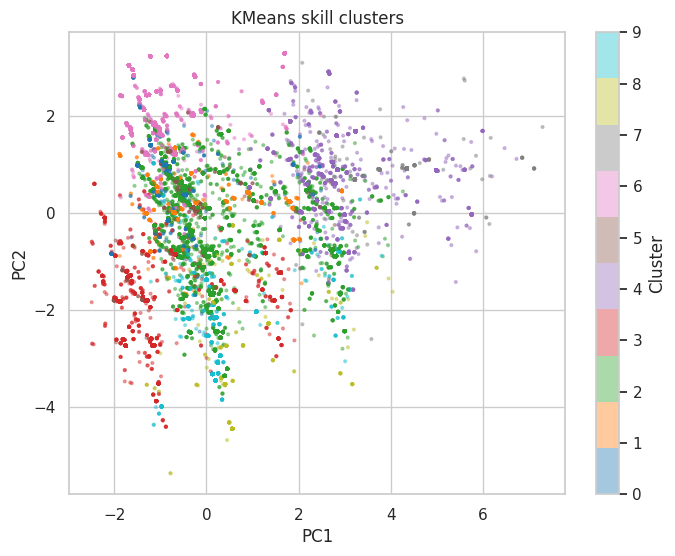

In [ ]:
#using PCA to reduce demension
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=clusters,
    s=4,
    alpha=0.4,
    cmap="tab10"
)
plt.title("KMeans skill clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()

### Skills and Salary Insights

Doc Refrences:
Group By: https://pandas.pydata.org/docs/user_guide/groupby.html

Idxmax: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.

Join: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

K-means Scikit: https://scikit-learn.org/stable/modules/clustering.html#k-means

In [ ]:
skills_clustered = skills.copy()
#cluster labels
skills_clustered["cluster"] = clusters

#Adding the medium salary as a feature to our clustered skills, joining by the job_id
df = skills_clustered.join(
    df_salaries
        .set_index("job_id")[["med_salary"]],
    how="inner"
)
#Grouping by the common medimum lalaries (thank you SQL skills)
cluster_salary = (
    df
        .groupby("cluster")["med_salary"]
        .mean()
        .sort_values(ascending=False)
)
#Medium salary for each cluster
cluster_salary


,med_salary
cluster,
5,84.791609
6,66.114490
9,65.479047
4,62.381080
2,60.318451
8,53.656909
0,52.758119
7,52.528448
3,44.613174


In [214]:
skill_cols = df_skills.columns
#Skill frequency within each cluster
cluster_skill_means = (
    df
        .groupby("cluster")[skill_cols]
        .mean()
)

#Top 3 clusters with the highest and lowest average salary
high_clusters = cluster_salary.head(3).index
low_clusters  = cluster_salary.tail(3).index
#So skills can appear clusters with high or low salaries
#for each skill, take how often it appears in high-paying clusters and subtract it from how often it appears in low paying clusters
skill_diff = (
    cluster_skill_means.loc[high_clusters].mean()
    - cluster_skill_means.loc[low_clusters].mean()
).sort_values(ascending=False)
#Leaves us with what percent more often a skill is in a high paying job then a low paying job
skill_diff.head(15)


,0
RSCH,0.334000
LGL,0.327355
SALE,0.320147
BD,0.209741
ANLS,0.206263
IT,0.175593
SCI,0.057614
FIN,0.053843
MRKT,0.036448
CUST,0.021211


In [215]:
#Mapping the kill to it's abbrivation to make it easier to read
job_function_map = {

    'MRKT': 'Marketing',
    'PR': 'Public Relations',
    'WRT': 'Writing',
    'SALE': 'Sales',
    'FIN': 'Finance',
    'ADVR': 'Advertising',
    'BD': 'Business Development',
    'ENG': 'Engineering',
    'PRJM': 'Project Management',
    'IT': 'Information Technology',
    'GENB': 'General Business',
    'ADM': 'Administration',
    'SUPL': 'Supply Chain',
    'MNFC': 'Manufacturing',
    'PROD': 'Product Management',
    'MGMT': 'Management',
    'TRNG': 'Training',
    'OTHR': 'Other',
    'LGL': 'Legal',
    'ACCT': 'Accounting',
    'DSGN': 'Design',
    'RSCH': 'Research',
    'ANLS': 'Analytics',
    'CNSL': 'Consulting',
    'EDU': 'Education',
    'PRCH': 'Purchasing / Procurement',
    'CUST': 'Customer Service',
    'QA': 'Quality Assurance',
    'HR': 'Human Resources',
    'SCI': 'Science',
    'HCPR': 'Healthcare / Patient Care',
    'STRA': 'Strategy',
    'ART': 'Arts / Creative',
    'DIST': 'Distribution / Logistics',
    'PRDM': 'Production Management'
}
skill_diff_df = skill_diff.reset_index()
skill_diff_df.columns = ["skill_code", "difference"]
skill_diff_df["skill_name"] = skill_diff_df["skill_code"].map(job_function_map)
skill_diff_df["difference"] = skill_diff_df["difference"] * 100
skill_diff_df

,skill_code,difference,skill_name
0,RSCH,33.400031,Research
1,LGL,32.735470,Legal
2,SALE,32.014739,Sales
3,BD,20.974111,Business Development
4,ANLS,20.626330,Analytics
5,IT,17.559294,Information Technology
6,SCI,5.761449,Science
7,FIN,5.384261,Finance
8,MRKT,3.644791,Marketing
9,CUST,2.121095,Customer Service


### Skill-to-Salary Insights
Research, Legal, Sales, Business Development, and Analysis appear more frequently in higher-paying job clusters compared to lower-paying clusters, indicating a strong association with higher-paying roles.

Skills with minimal or 0 differences show little distinction between higher- and lower-paying clusters.

Public Relations, Purchasing, Manufacturing, Human Resources and Management are associated with lower paying roles and are assoicated with lower paying clusters


### Skill-to-Location Insights

In [216]:
#isolationg location and job id
post_loc = (
    df_postings[["job_id", "location"]]
        .drop_duplicates(subset="job_id")
)

#joining the dataframes to get location
post_loc = post_loc.set_index("job_id")
df_with_loc = df.join(post_loc, how="left")

#grouping by location and finding the frequency of each skill
location_skill_means = (
    df_with_loc
        .groupby("location")[skill_cols]
        .mean()
)
#idxmax returns largest column value in each row
# adding axis=1 param will look at columns instead of rows.
top_skill_per_location = location_skill_means.idxmax(axis=1)
print(top_skill_per_location)

print(" ")
print("Top Skills in top tech marchets")
print("Seattle, WA:", top_skill_per_location["Seattle, WA"])
print("San Francisco, CA:", top_skill_per_location["San Francisco, CA"])
print("San Jose, CA:", top_skill_per_location["San Jose, CA"])
print("New York, NY:", top_skill_per_location["New York, NY"])
print("Austin, TX:", top_skill_per_location["Austin, TX"])



location
Aberdeen Proving Ground, MD      IT
Aberdeen, MD                    ENG
Aberdeen, WA                     PR
Abilene, TX                      PR
Abingdon, MD                   MRKT
                               ... 
Yuma, AZ                         PR
Zanesville, OH                 MGMT
Zebulon, NC                      PR
Zelienople, PA                  FIN
Zionsville, IN                  ENG
Length: 4488, dtype: object
 
Top Skills in top tech marchets
Seattle, WA: IT
San Francisco, CA: SALE
San Jose, CA: IT
New York, NY: SALE
Austin, TX: IT


In [217]:
# looking at the top 10 skills in a specific market
location_skill_means.loc["Seattle, WA"].sort_values(ascending=False).head(10)


,"Seattle, WA"
IT,0.391101
PR,0.278689
ENG,0.194379
SALE,0.126464
MGMT,0.091335
BD,0.084309
PRJM,0.081967
HCPR,0.081967
HR,0.079625
PRDM,0.072600


# 6 - Hierarchical Clustering Implementation

### Building the Model

In [19]:
X = df_salaries

agg_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
labels = agg_model.fit_predict(X)

ValueError: could not convert string to float: 'USD'

### Plotting the Model

In [ ]:
# Plots a dendrogram for a given model.
def plot_dendrogram(model, num_levels=5):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, truncate_mode='level', p=num_levels)

# Plots the Agglomerative Clustering diagram.
def plot_hierarchical_clusters(model):
    plot_dendrogram(model)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Points In Node")
    plt.ylabel("Distance")
    plt.show()

### Evaluating the Model

### Model Insights